First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Training Samples: 1940
Testing Samples: 832
DEBUG R2 LR = 0.7443308125692929 <class 'float'>

===== Linear Regression Results =====
R2 Score: 0.7443308125692929
MSE: 40004195.942378715
RMSE: 6324.887030009209
DEBUG R2 RF = 0.9332645858973043 <class 'float'>

===== Random Forest Results =====
R2 Score: 0.9332645858973043
MSE: 10441995.802812872
RMSE: 3231.407712253728

===== Model Comparison =====
Linear Regression R2: 0.7443308125692929
Random Forest R2: 0.9332645858973043
Linear Regression MSE: 40004195.942378715
Random Forest MSE: 10441995.802812872
Linear Regression RMSE: 6324.887030009209
R

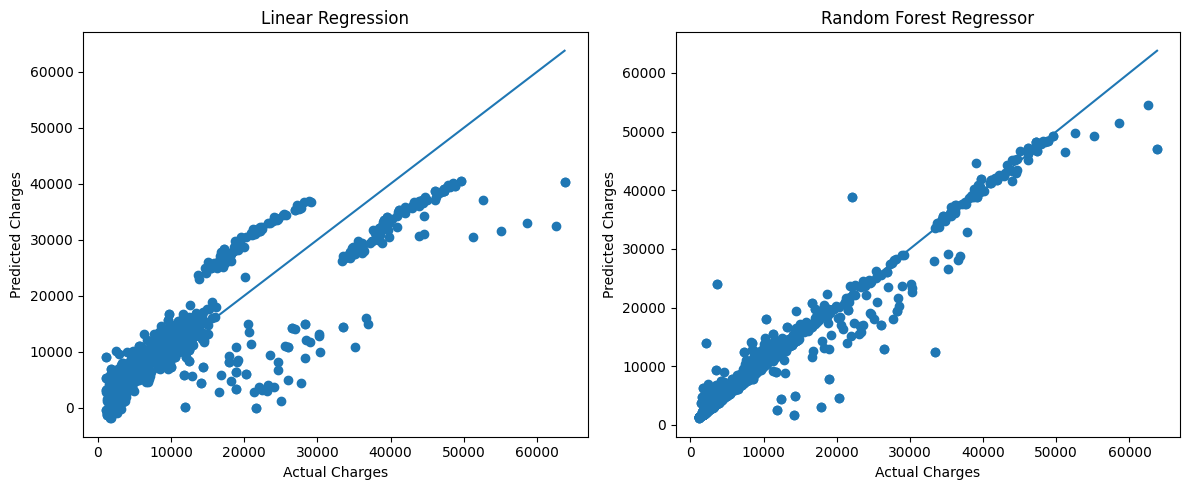

In [1]:
# ===============================
# Medical Insurance Regression
# Linear Regression vs Random Forest
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error


# ===============================
# 1. Load Dataset
# ===============================

data = pd.read_csv("medical_insurance_RegressionDataset.csv")

print("First 5 Rows:")
print(data.head())



# ===============================
# 2. Separate Features & Target
# ===============================

X = data.iloc[:, :-1]   # Input features
y = data.iloc[:, -1]    # Target (charges)

#print("\nFeatures:")
#print(X.head())

#print("\nTarget:")
#print(y.head())


# ===============================
# 3. Encode Categorical Columns
# ===============================

# Change column names if different in your file
categorical_cols = ['sex', 'smoker', 'region']

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)


# ===============================
# 4. Train-Test Split
# ===============================

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


# ===============================
# 5. MULTIPLE LINEAR REGRESSION
# ===============================

lr = LinearRegression()

lr.fit(X_train, Y_train)

# Prediction
y_pred_lr = lr.predict(X_test)

# Evaluation
r2_lr = r2_score(Y_test, y_pred_lr)
print("DEBUG R2 LR =", r2_lr, type(r2_lr))

mse_lr = mean_squared_error(Y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("\n===== Linear Regression Results =====")
print("R2 Score:", r2_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)


# ===============================
# 6. RANDOM FOREST REGRESSOR
# ===============================

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, Y_train)

# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluation
r2_rf = r2_score(Y_test, y_pred_rf)
print("DEBUG R2 RF =", r2_rf, type(r2_rf))

mse_rf = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("\n===== Random Forest Results =====")
print("R2 Score:", r2_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)


# ===============================
# 7. COMPARISON
# ===============================

print("\n===== Model Comparison =====")

print("Linear Regression R2:", r2_lr)
print("Random Forest R2:", r2_rf)


print("Linear Regression MSE:", mse_lr)
print("Random Forest MSE:", mse_rf)

print("Linear Regression RMSE:", rmse_lr)
print("Random Forest RMSE:", rmse_rf)


# ===============================
# 8. PLOT: ACTUAL vs PREDICTED
# ===============================

plt.figure(figsize=(12,5))


# Linear Regression Plot
plt.subplot(1,2,1)

plt.scatter(Y_test, y_pred_lr)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()])

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression")


# Random Forest Plot
plt.subplot(1,2,2)

plt.scatter(Y_test, y_pred_rf)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()])

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Random Forest Regressor")


plt.tight_layout()
plt.show()


In [2]:
import joblib

joblib.dump((ct, rf), "insurance_pipeline.pkl")

print("Saved: insurance_pipeline.pkl")


Saved: insurance_pipeline.pkl
